In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns #for background style for plots
from matplotlib.pyplot import figure #plot size
import matplotlib.style #Setting the theme of your plots

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

# Data Gathering

In [2]:
data = pd.read_csv('train.csv')
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [3]:
data.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [4]:
data.shape

(33908, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
feature_0     33908 non-null float64
feature_1     33908 non-null float64
feature_2     33908 non-null float64
feature_3     33908 non-null float64
feature_4     33908 non-null float64
feature_5     33908 non-null float64
feature_6     33908 non-null float64
feature_7     33908 non-null int64
feature_8     33908 non-null int64
feature_9     33908 non-null int64
feature_10    33908 non-null int64
feature_11    33908 non-null int64
feature_12    33908 non-null int64
feature_13    33908 non-null int64
feature_14    33908 non-null int64
feature_15    33908 non-null int64
labels        33908 non-null int64
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [9]:
#Verifying balanced or imbalnced
data['labels'].value_counts()

0    29941
1     3967
Name: labels, dtype: int64

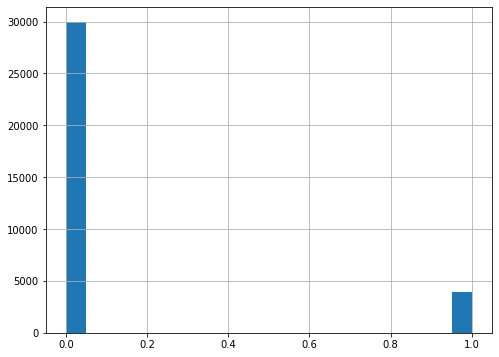

In [7]:
data['labels'].hist(bins =20, figsize =(8,6))

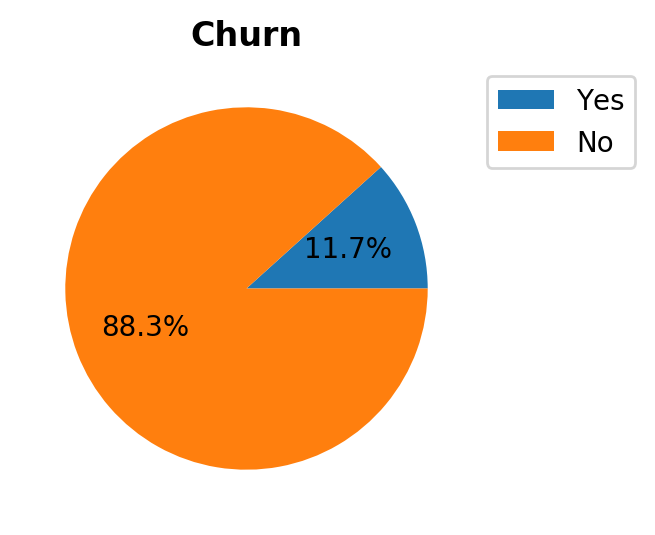

In [12]:
#Pie Chart
#Calculating Churn Percentage
yes=len(data[data['labels']==1.0])
no=len(data[data['labels']==0.0])
tot=len(data)

yes=(yes/tot)*100
no=(no/tot)*100

Churn_Perc=[yes,no]
figure(num=None, figsize=(5, 3), dpi=200)
plt.pie(Churn_Perc,autopct='%1.1f%%')
plt.title("Churn",weight="bold")
labels=['Yes','No']
plt.legend(labels,bbox_to_anchor=(1, 1))
plt.show()


This is imbalanced data

In [13]:
data.dtypes

feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7       int64
feature_8       int64
feature_9       int64
feature_10      int64
feature_11      int64
feature_12      int64
feature_13      int64
feature_14      int64
feature_15      int64
labels          int64
dtype: object

In [14]:
#Missing Values identifying

data.isnull().sum()


feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [17]:
#Correlation with Target
cr=data.corr()
cr.labels

feature_0     0.019405
feature_1     0.048611
feature_2    -0.033345
feature_3     0.392971
feature_4    -0.075025
feature_5     0.106239
feature_6     0.119322
feature_7     0.038588
feature_8     0.046193
feature_9     0.068356
feature_10   -0.023344
feature_11   -0.135662
feature_12   -0.065480
feature_13   -0.148583
feature_14   -0.026178
feature_15   -0.079190
labels        1.000000
Name: labels, dtype: float64

In [36]:
#Low corrleated variables with target

del_cols = [col for col in cr.labels.index if cr.labels[col]<=0.05 and cr.labels[col]>=-0.05 ]
len(del_cols)

7

In [44]:
#drop above columns
data1=data.drop(del_cols,axis=1)
data1.shape

(33908, 10)

In [21]:
#Multi-Colliniarity

def multi_crr(X):
    crr=X.corr()
    crr_variables=[]
    crr_var=[]
    cols_list=crr.columns.to_list()
    for i in cols_list:
        val=0
        for j in cols_list:
            if i!=j:
                if crr[i][j]>0.8:
                    if ([i,j] not in crr_variables) and ([j,i] not in crr_variables):
                                crr_variables.append([i,j])
                                
                                
    output = []
    for x in crr_variables:
        if x[1] not in output:
            output.append(x[1])                            
    return output   

In [45]:
crr_var = multi_crr(data1.drop('labels',axis=1))
crr_var 

[]

There areno multi colliniar variables

In [46]:
#Verify columns with single value and drop them 

single_value_cols=[col for col in data1.columns if len(data1[col].unique())==1]
single_value_cols

[]

No null variance variables

In [47]:
#Data Partition
X=data1.drop('labels',axis=1)
y=data1['labels']

# Treatment to imbalacnced data

In [48]:
#Under Sampling

from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X1, y1 = undersample.fit_resample(X, y)
X1.shape

(7934, 9)

# Model Training

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

def model_build(X, y, model):
    #Data Splitting
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    #Model Fitting
    model.fit(X_train,y_train)
    #Prediction
    y_pred = model.predict(X_test)    
    print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
    print('accuracy_score   :   ', accuracy_score(y_test,y_pred))
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()    

# Logistic Regression

Confusion matrix:  
 [[1072  110]
 [ 252  947]]
accuracy_score   :    0.8479630407391853


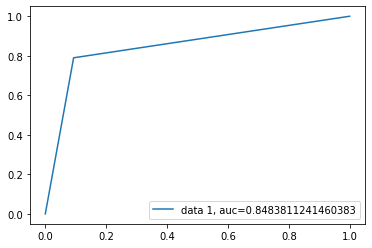

In [75]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()

model_build(X1,y1, LG)

# NaiveBayes Classifier

Confusion matrix:  
 [[1136   46]
 [ 373  826]]
accuracy_score   :    0.8240235195296094


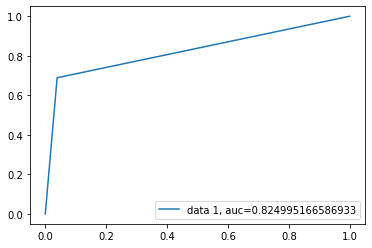

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB ,BernoulliNB ,CategoricalNB
GNB=BernoulliNB()

model_build(X1,y1, GNB)

# RFC

Confusion matrix:  
 [[1120   62]
 [ 252  947]]
accuracy_score   :    0.868122637547249


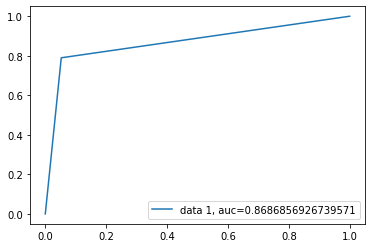

In [77]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(n_estimators=50, random_state=1 ,bootstrap= True ,max_depth=10 )


model_build(X1,y1, RFC)

RFC is the final model